In [1]:
import numpy as np
import netCDF4 as nc
import f90nml
import os
from salishsea_tools import bio_tools as bio
from salishsea_tools import viz_tools, visualisations
import matplotlib.pyplot as plt
import cmocean
import matplotlib as mpl
%matplotlib inline

In [2]:
# load necessary files
resDir='/results2/SalishSea/hindcast.201812_annex/01jul17/'
nampisprod=bio.load_nml_bio(resDir,'nampisprod')
fdia=nc.Dataset(os.path.join(resDir,'SalishSea_1h_20170701_20170701_carp_T.nc'))
fptc=nc.Dataset(os.path.join(resDir,'SalishSea_1h_20170701_20170701_ptrc_T.nc'))
m=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc')
tmask=m.variables['tmask'][:,:,:,:]
tmask=np.copy(m.variables['tmask'])
navlon=np.copy(m.variables['nav_lon'])
navlat=np.copy(m.variables['nav_lat'])
m.close()
fb=nc.Dataset('/data/eolson/MEOPAR/NEMO-forcing-new/grid/bathymetry_201702.nc')
fm=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc')

In [3]:
# times 9, 19 are around noon local time
I=fdia.variables['PAR'][20,:,:,:]
NO=fptc.variables['nitrate'][20,:,:,:]
NH=fptc.variables['ammonium'][20,:,:,:]
Si=fptc.variables['silicon'][20,:,:,:]

In [4]:
D,M,N = bio.calc_p_limiters(I,NO,NH,Si,tmask[0,:,:,:],nampisprod)

In [5]:
np.shape(fptc.variables['deptht']),np.shape(D['ILim'])

((40,), (40, 898, 398))

In [6]:
cm1=cmocean.cm.ice

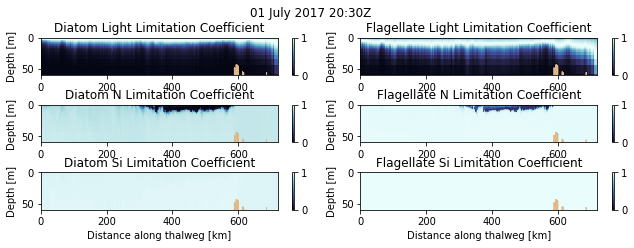

In [9]:
fig,ax=plt.subplots(3,2,figsize=(9,3.3))
fig.subplots_adjust(hspace=.8,wspace=.08,left=0.08,right=1.03,top=.85)
maxz=60
iax=ax[0,0]
m=visualisations.contour_thalweg(iax,D['ILim'],fb,fm,method='pcolormesh',cmap=cm1,mesh_args={'vmin':0,'vmax':1})
iax.set_title('Diatom Light Limitation Coefficient')
iax.set_xlabel('')
iax.set_ylim(maxz,0)

iax=ax[1,0]
m=visualisations.contour_thalweg(iax,D['NLim'],fb,fm,method='pcolormesh',cmap=cm1,mesh_args={'vmin':0,'vmax':1})
iax.set_title('Diatom N Limitation Coefficient')
iax.set_xlabel('')
iax.set_ylim(maxz,0)

iax=ax[2,0]
m=visualisations.contour_thalweg(iax,D['SiLim'],fb,fm,method='pcolormesh',cmap=cm1,mesh_args={'vmin':0,'vmax':1})
iax.set_title('Diatom Si Limitation Coefficient')
iax.set_ylim(maxz,0)

iax=ax[0,1]
m=visualisations.contour_thalweg(iax,N['ILim'],fb,fm,method='pcolormesh',cmap=cm1,mesh_args={'vmin':0,'vmax':1})
iax.set_title('Flagellate Light Limitation Coefficient')
iax.set_xlabel('')
iax.set_ylim(maxz,0)

iax=ax[1,1]
m=visualisations.contour_thalweg(iax,N['NLim'],fb,fm,method='pcolormesh',cmap=cm1,mesh_args={'vmin':0,'vmax':1})
iax.set_title('Flagellate N Limitation Coefficient')
iax.set_xlabel('')
iax.set_ylim(maxz,0)

iax=ax[2,1]
m=visualisations.contour_thalweg(iax,N['SiLim'],fb,fm,method='pcolormesh',cmap=cm1,mesh_args={'vmin':0,'vmax':1})
iax.set_title('Flagellate Si Limitation Coefficient')
iax.set_ylim(maxz,0)

fig.suptitle('01 July 2017 20:30Z ')
fig.savefig('/home/eolson/pyCode/notebooks/figs/limitationThw_20170701.png',dpi=400,transparent=True)